In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/amazon_products_dataset.csv')

In [ ]:
df.head()

,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0


In [ ]:
df.tail()

,title,brand,category,actual_price,discount_price,rating,rating_count
1995,Smartphone with AMOLED Display,Dell,Monitor,24140.0,20202.0,3.0,16058.0
1996,Smart Fitness Watch,LG,Headphones,65449.0,64559.0,1.1,6655.0
1997,4K Action Camera,Dell,Smartphone,21358.0,18654.0,3.7,5308.0
1998,Noise Cancelling Earbuds,OnePlus,Smartwatch,35229.0,31061.0,2.2,19105.0
1999,Smartphone with AMOLED Display,Boat,Headphones,31662.0,31047.0,3.2,1064.0


In [ ]:
df.shape


(2000, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           2000 non-null   object 
 1   brand           2000 non-null   object 
 2   category        1998 non-null   object 
 3   actual_price    1998 non-null   float64
 4   discount_price  1999 non-null   float64
 5   rating          1996 non-null   float64
 6   rating_count    1996 non-null   float64
dtypes: float64(4), object(3)
memory usage: 109.5+ KB


In [ ]:
print(df['category'].unique())

['Laptop' 'Smartwatch' 'Headphones' 'Camera' 'Monitor' 'Speaker' 'Tablet'
 'Smartphone' nan]


In [ ]:
print(df.isnull().sum())

title             0
brand             0
category          2
actual_price      2
discount_price    1
rating            4
rating_count      4
dtype: int64


In [ ]:
print(df.dtypes)

title              object
brand              object
category           object
actual_price      float64
discount_price    float64
rating            float64
rating_count      float64
dtype: object


In [ ]:
df['discount_price'].fillna(df['discount_price'].mean(), inplace=True)
df['rating'].fillna(df['rating'].mean(),inplace=True)
df['rating_count'].fillna(df['rating_count'].mean(),inplace=True)
df['actual_price'].fillna(df['actual_price'].mean(),inplace=True)

/tmp/ipython-input-2311068235.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['discount_price'].fillna(df['discount_price'].mean(), inplace=True)
/tmp/ipython-input-2311068235.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, 

In [ ]:
df['brand'].fillna('Unknown', inplace=True)
df['category'].fillna('Unknown', inplace=True)

/tmp/ipython-input-2575238730.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['brand'].fillna('Unknown', inplace=True)


In [ ]:
df.isnull().sum()

,0
title,0
brand,0
category,0
actual_price,0
discount_price,0
rating,0
rating_count,0


In [ ]:
df=df.drop_duplicates()
df=df.reset_index(drop=True)

In [ ]:
df

,title,brand,category,actual_price,discount_price,rating,rating_count
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0
...,...,...,...,...,...,...,...
1995,Smartphone with AMOLED Display,Dell,Monitor,24140.0,20202.0,3.0,16058.0
1996,Smart Fitness Watch,LG,Headphones,65449.0,64559.0,1.1,6655.0
1997,4K Action Camera,Dell,Smartphone,21358.0,18654.0,3.7,5308.0
1998,Noise Cancelling Earbuds,OnePlus,Smartwatch,35229.0,31061.0,2.2,19105.0


In [ ]:
# Identify the top 5 most expensive products (actual_price).
print(df.nlargest(5, 'actual_price'))

                 title  brand    category  actual_price  discount_price  \
1383    Android Tablet    JBL      Laptop       79993.0         78094.0   
1974     Gaming Laptop     LG     Monitor       79869.0         77173.0   
1403  4K Action Camera   Sony  Headphones       79857.0         77469.0   
1351    Android Tablet   Sony     Monitor       79853.0         78831.0   
42       Gaming Laptop  Apple  Smartwatch       79826.0         76919.0   

      rating  rating_count  
1383     3.0        7666.0  
1974     2.6        5232.0  
1403     2.7        1379.0  
1351     4.8        7596.0  
42       3.8       10252.0  


In [ ]:
# Find the brand with the highest number of products.
top_brand = df['brand'].value_counts().idxmax()
print(top_brand)


Boat


In [ ]:
# Compute the average discount percentage for each brand.
# Identify products with rating ≥ 4.5 and rating_count ≥ 2000.
# Compute category-wise average price.

df['discount_percent'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100
avg_discount = df.groupby('brand')['discount_percent'].mean().sort_values(ascending=False)
print(avg_discount.head(10))


brand
Apple      12.721996
Boat       12.546502
LG         11.968799
HP         11.501202
OnePlus    11.380987
JBL        11.370137
Dell       11.165004
Sony       10.388873
Mi         10.162308
Samsung     9.302573
Name: discount_percent, dtype: float64


In [ ]:
rat=df[(df['rating'] >= 4.5) & (df['rating_count'] >= 2000)]
print(rat)

                               title    brand    category  actual_price  \
4                Smart Fitness Watch  Samsung     Monitor       49224.0   
32                  4K Action Camera  OnePlus  Smartphone        7793.0   
51     Wireless Bluetooth Headphones     Dell  Headphones       61569.0   
52           Laptop with SSD Storage     Boat  Smartwatch       76286.0   
59                     Gaming Laptop  Samsung      Tablet       45250.0   
...                              ...      ...         ...           ...   
1949      Portable Bluetooth Speaker  OnePlus      Tablet       59325.0   
1970                  Android Tablet     Boat      Camera       20841.0   
1975   Wireless Bluetooth Headphones  Samsung  Smartwatch       31973.0   
1982   Wireless Bluetooth Headphones       HP      Camera       15343.0   
1988  Smartphone with AMOLED Display       LG      Tablet       29783.0   

      discount_price  rating  rating_count  discount_percent  
4            45017.0     4.9       1

In [ ]:
avg_price_by_category = df.groupby('category')['actual_price'].mean().sort_values(ascending=False)
print(avg_price_by_category)


category
Laptop        40822.874477
Camera        40352.246094
Monitor       39949.431596
Tablet        39943.815217
Speaker       39683.449141
Headphones    39576.147679
Smartwatch    38316.913934
Smartphone    37909.529412
Unknown       33610.500000
Name: actual_price, dtype: float64


In [ ]:
df.head()

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0,6.608957
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0,4.184451
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0,8.988944
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0,7.145786
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,8.546644


Task 4 — Programming Task: Feature Engineering + Logical Filters
Task 4A — Create New Columns
Write code to create:
discount_percent = ((actual_price - discount_price) / actual_price) * 100
price_category based on:
actual_price < 500 → "Budget"
500 ≤ price < 2000 → "Midrange"
price ≥ 2000 → "Premium"
popularity_score = rating * log(rating_count + 1)   "||||"
Task 4B — Filtering Using New Columns
Using the newly created columns:
Show top 10 highest popularity_score products.
Show all Premium category items with discount_percent > 40%.
Show all products whose title contains "Bluetooth" (string filter).
Show products where:
rating >= 4.0
discount_percent between 20% to 50%
popularity_score in the top 30% percentile
(Use .between() and .quantile())    "||||"
Task 4C — Grouping with New Columns
Find the average discount_percent for each brand.
Find the average popularity_score for each price_category.
Identify which category offers the highest average discount.
Calculate total revenue potential per brand using:
revenue_potential = actual_price * rating_count


In [ ]:
# discount percent completed
def get_price_category(x):
    if x < 500:
        return "Budget"
    elif x < 2000:
        return "Midrange"
    else:
        return "Premium"

df['price_category'] = df['actual_price'].apply(get_price_category)


In [ ]:
df['popularity_score'] = df['rating'] * np.log(df['rating_count'] + 1)

In [ ]:
df.head()

,title,brand,category,actual_price,discount_price,rating,rating_count,discount_percent,price_category,popularity_score
0,Smart Fitness Watch,Dell,Laptop,69890.0,65271.0,2.6,2128.0,6.608957,Premium,19.924860
1,Laptop with SSD Storage,LG,Smartwatch,66771.0,63977.0,2.5,9118.0,4.184451,Premium,22.795289
2,High Resolution Monitor,Mi,Headphones,43598.0,39679.0,1.9,2517.0,8.988944,Premium,14.879318
3,4K Action Camera,HP,Camera,63408.0,58877.0,3.7,17533.0,7.145786,Premium,36.156019
4,Smart Fitness Watch,Samsung,Monitor,49224.0,45017.0,4.9,14228.0,8.546644,Premium,46.858883


In [ ]:
# 1) Top 10 highest popularity_score products
top10_pop = df.sort_values('popularity_score', ascending=False).head(10)
print(top10_pop[['title','brand','category','rating','rating_count','popularity_score','discount_price']])

# 2) Premium items with discount_percent > 40%
prem_40 = df[(df['price_category'] == 'Premium') & (df['discount_percent'] > 40)]
print(prem_40[['title','brand','actual_price','discount_price','discount_percent','price_category']])

# 3) Title contains "Bluetooth" (case-insensitive)
bt = df[df['title'].str.contains('Bluetooth', case=False, na=False)]
print(bt[['title','brand','category','actual_price','discount_price','rating']])

# 4) rating >= 4.0, discount_percent between 20–50, popularity_score in top 30%
pop_thresh = df['popularity_score'].quantile(0.70)  # top 30% = above 70th percentile
filt = (
    (df['rating'] >= 4.0) &
    (df['discount_percent'].between(20, 50, inclusive='both')) &
    (df['popularity_score'] >= pop_thresh)
)
res = df[filt].sort_values('popularity_score', ascending=False)
print(res[['title','brand','rating','discount_percent','popularity_score']])


In [ ]:
avg_discount_brand = df.groupby('brand')['discount_percent'].mean().sort_values(ascending=False)
print(avg_discount_brand)


brand
Apple      12.721996
Boat       12.546502
LG         11.968799
HP         11.501202
OnePlus    11.380987
JBL        11.370137
Dell       11.165004
Sony       10.388873
Mi         10.162308
Samsung     9.302573
Name: discount_percent, dtype: float64


In [ ]:
avg_popularity_price_cat = df.groupby('price_category')['popularity_score'].mean().sort_values(ascending=False)
print(avg_popularity_price_cat)


price_category
Budget      38.147220
Premium     26.366914
Midrange    23.660324
Name: popularity_score, dtype: float64


In [ ]:
avg_discount_category = df.groupby('category')['discount_percent'].mean().sort_values(ascending=False)

highest_disc_category = avg_discount_category.idxmax()
highest_disc_value = avg_discount_category.max()

print("Category with highest average discount:", highest_disc_category, f"({highest_disc_value:.2f}%)")


Category with highest average discount: Headphones (12.60%)


In [ ]:
df['revenue_potential'] = df['actual_price'] * df['rating_count']

revenue_per_brand = df.groupby('brand')['revenue_potential'].sum().sort_values(ascending=False)
print(revenue_per_brand)


brand
HP         8.297444e+10
OnePlus    8.247380e+10
LG         8.158494e+10
Samsung    8.117230e+10
Sony       7.930446e+10
Boat       7.744874e+10
JBL        7.723438e+10
Mi         7.698029e+10
Dell       7.549826e+10
Apple      6.706084e+10
Name: revenue_potential, dtype: float64


Task 5 — Data Visualization
Use the specific plot type mentioned:
Price distribution → Histogram + KDE
Relationship between price and rating → Scatter Plot
Category-wise average rating → Bar Plot
Brand product count → Count Plot
Numeric feature correlations → Heatmap


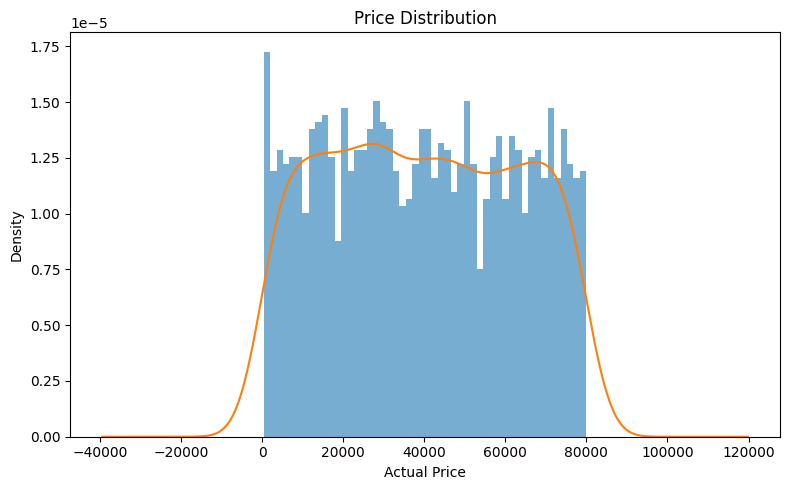

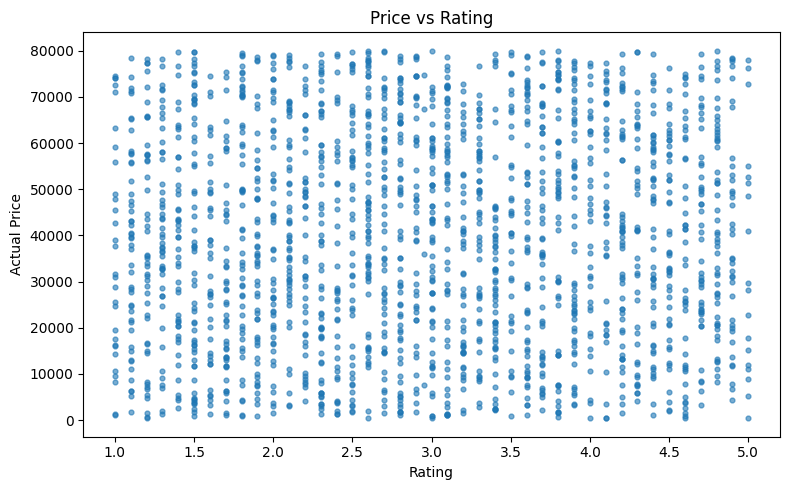

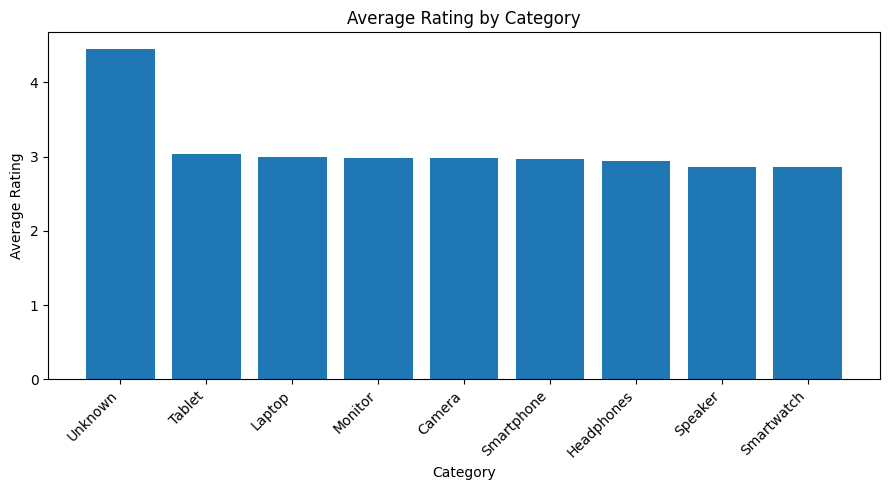

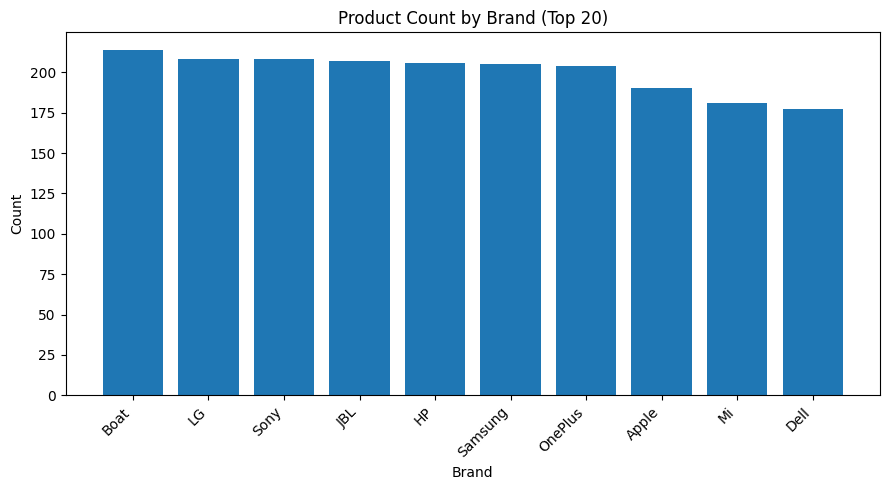

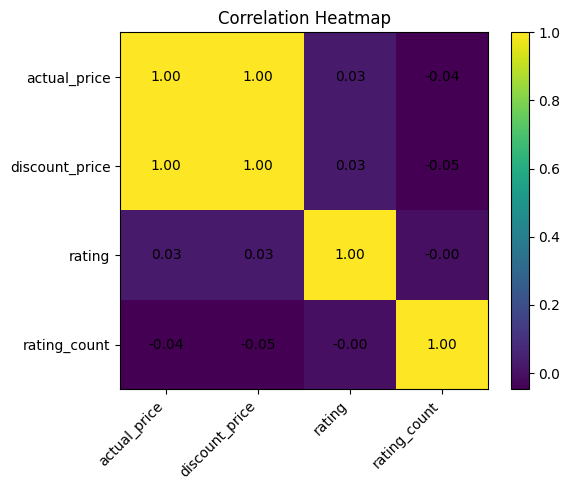

In [ ]:
plt.figure(figsize=(8,5))
df['actual_price'].plot(kind='hist', bins=50, density=True, alpha=0.6)
# KDE (requires scipy via pandas); if it errors in your env, comment next line
df['actual_price'].plot(kind='kde')
plt.title("Price Distribution")
plt.xlabel("Actual Price")
plt.ylabel("Density")
plt.tight_layout()
plt.show()

# ---------- 2) Relationship between price and rating: Scatter ----------
plt.figure(figsize=(8,5))
plt.scatter(df['rating'], df['actual_price'], s=12, alpha=0.6)
plt.title("Price vs Rating")
plt.xlabel("Rating")
plt.ylabel("Actual Price")
plt.tight_layout()
plt.show()

# ---------- 3) Category-wise average rating: Bar Plot ----------
avg_rating_cat = df.groupby('category', dropna=False)['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(9,5))
plt.bar(avg_rating_cat.index.astype(str), avg_rating_cat.values)
plt.title("Average Rating by Category")
plt.xlabel("Category")
plt.ylabel("Average Rating")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ---------- 4) Brand product count: Count Plot (bar) ----------
brand_counts = df['brand'].value_counts().head(20)  # top 20 to keep readable
plt.figure(figsize=(9,5))
plt.bar(brand_counts.index.astype(str), brand_counts.values)
plt.title("Product Count by Brand (Top 20)")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# ---------- 5) Numeric feature correlations: Heatmap ----------
num_cols = ['actual_price','discount_price','rating','rating_count']
num_cols = [c for c in num_cols if c in df.columns]
corr = df[num_cols].corr(numeric_only=True)

plt.figure(figsize=(6,5))
im = plt.imshow(corr.values, aspect='auto')
plt.colorbar(im)
plt.xticks(ticks=np.arange(len(num_cols)), labels=num_cols, rotation=45, ha='right')
plt.yticks(ticks=np.arange(len(num_cols)), labels=num_cols)
plt.title("Correlation Heatmap")

# annotate cells
for i in range(len(num_cols)):
    for j in range(len(num_cols)):
        plt.text(j, i, f"{corr.values[i, j]:.2f}", ha='center', va='center')

plt.tight_layout()
plt.show()
